<a href="https://colab.research.google.com/github/mansikataria/FacialExpressionRecognition/blob/main/FacialExpressionRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install watermark
%load_ext watermark
%watermark -a 'Mansi Kataria' -v -p torch

Reading the FER2013 dataset from the CSV

In [44]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
BASE_PATH = '/content/drive/MyDrive/Colab Notebooks'
sys.path.insert(0,BASE_PATH)

FER2013_PATH_FILE_NAME = 'fer2013.csv'

data = pd.read_csv(BASE_PATH + '/' + FER2013_PATH_FILE_NAME)

print(data)


In [2]:
emotion_map = {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

Visualizations on the data:

1. Let's see the class distribution

In [11]:
emotion_counts = data['emotion'].value_counts(sort=False).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)
emotion_counts

,emotion,number
0,Angry,4953
1,Digust,547
2,Fear,5121
3,Happy,8989
4,Sad,6077
5,Surprise,4002
6,Neutral,6198


Plotting a bar graph with these values:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


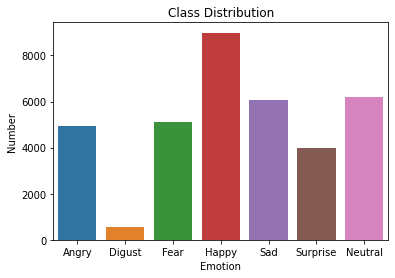

In [14]:
plt.figure(figsize=(6,4))
sns.barplot(emotion_counts.emotion, emotion_counts.number)
plt.title('Class Distribution')
plt.ylabel('Number', fontsize=10)
plt.xlabel('Emotion', fontsize=10)
plt.show()

Plotting some sample images:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must spec

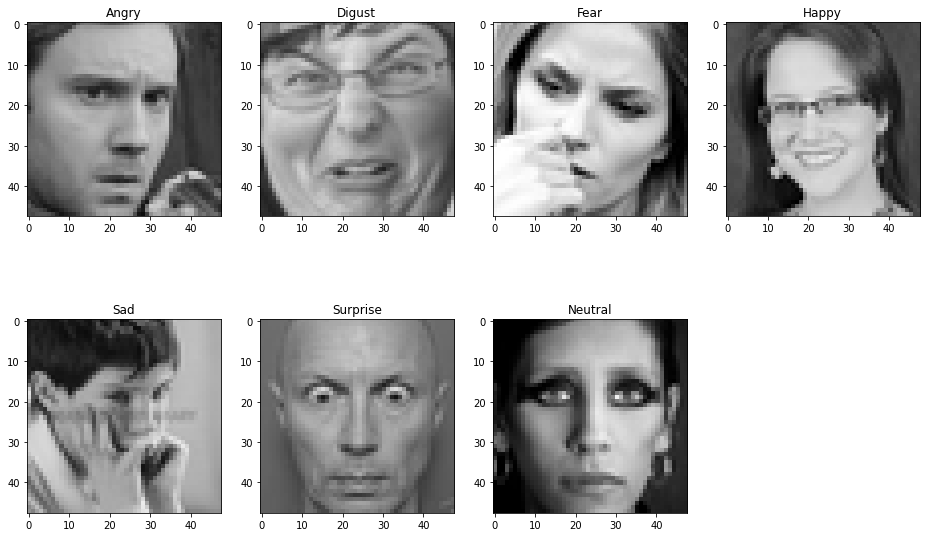

In [23]:
def row2Image(row):
  pixels, emotions = row['pixels'] , emotion_map[row['emotion']]
  img = np.array(pixels.split())
  img = img.reshape((48, 48))
  image = np.zeros((48, 48, 3))
  image[:,:, 0] = img
  image[:,:, 1] = img
  image[:,:, 2] = img
  return np.array([image.astype(np.uint8), emotions])

plt.figure(0, figsize=(16, 10))
for i in range(1, 8):
  face = data[data['emotion'] == i-1].iloc[0]
  img = row2Image(face)
  plt.subplot(2,4,i)
  plt.imshow(img[0])
  plt.title(img[1])

plt.show()

Splitting data into train, test and validation sets:


In [26]:
data_train = data[data['Usage'] == 'Training'].copy()
data_val = data[data['Usage'] == 'PublicTest'].copy() 
data_test = data[data['Usage'] == 'PrivateTest'].copy()

print("Train Shape: {}\nTest Shape: {}\nValidation Shape: {}".format(data_train.shape, data_test.shape, data_val.shape));

Train Shape: (28709, 3)
Test Shape: (3589, 3)
Validation Shape: (3589, 3)


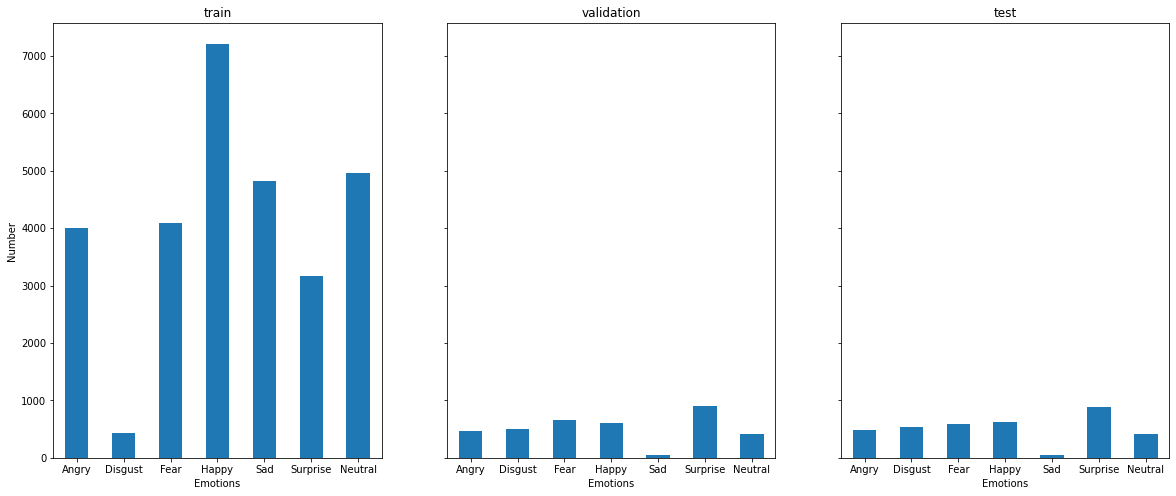

In [29]:
# barplot class distribution of train, val and test
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def setup_axe(axe,df,title):
    df['emotion'].value_counts(sort=False).plot(ax=axe, kind='bar', rot=0)
    axe.set_xticklabels(emotion_labels)
    axe.set_xlabel("Emotions")
    axe.set_ylabel("Number")
    axe.set_title(title)
   
fig, axes = plt.subplots(1,3, figsize=(20,8), sharey=True)
setup_axe(axes[0],data_train,'train')
setup_axe(axes[1],data_val,'validation')
setup_axe(axes[2],data_test,'test')
plt.show()

In [38]:
#initilize parameters
num_classes = 7 
width, height = 48, 48
num_epochs = 50
batch_size = 32
# num_features = 64

In [45]:
#image preprocessing:

def preprocess(df):
  data_X = np.array(df['pixels'].tolist(), dtype='float32').reshape(-1,width, height,1)
  data_Y = to_categorical(df['emotion'], num_classes) 
  print("X shape: {},  Y shape: {}".format(data_X.shape, data_Y.shape))
  return data_X, data_Y

print('Preprocessing Training Data...')
data_train_X, data_train_Y = preprocess(data_train)


Preprocessing Training Data...
X shape: (28709, 48, 48, 1),  Y shape: (28709, 7)
